In [1]:
import necstdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
dataname = "necst_positionswitching_20240817_204905_2"
datapath_sky = f"./{dataname}"
db = necstdb.opendb(datapath_sky)
#data_altaz = db.open_table("necst-NANTEN2-ctrl-antenna-altaz").read(astype="pandas").set_index("time")
#data_encoder = db.open_table("necst-NANTEN2-ctrl-antenna-encoder").read(astype="pandas").set_index("time")

In [3]:
topic_names = [f'necst-NANTEN2-data-spectral-board{i+1}' for i in range(15)]

In [4]:
specs = [db.open_table(topic).read(astype="array") for topic in topic_names]

In [5]:
hot_list = []
on_list = []
off_list = []
for spec in specs:
    hot = np.nanmean(spec["data"][spec["position"] == b'HOT     '], axis=0)
    on = spec["data"][(spec["position"] == b'SKY     ') & (spec["id"] == b'on              ')]
    off = spec["data"][(spec["position"] == b'SKY     ') & (spec["id"] == b'off             ')]
    on = np.nanmean(on, axis=0)
    off = np.nanmean(off, axis=0)
    on_list.append(on)
    hot_list.append(hot)
    off_list.append(off)

In [6]:
np.unique(specs[0]["position"])

array([b'        ', b'HOT     ', b'SKY     '], dtype='|S8')

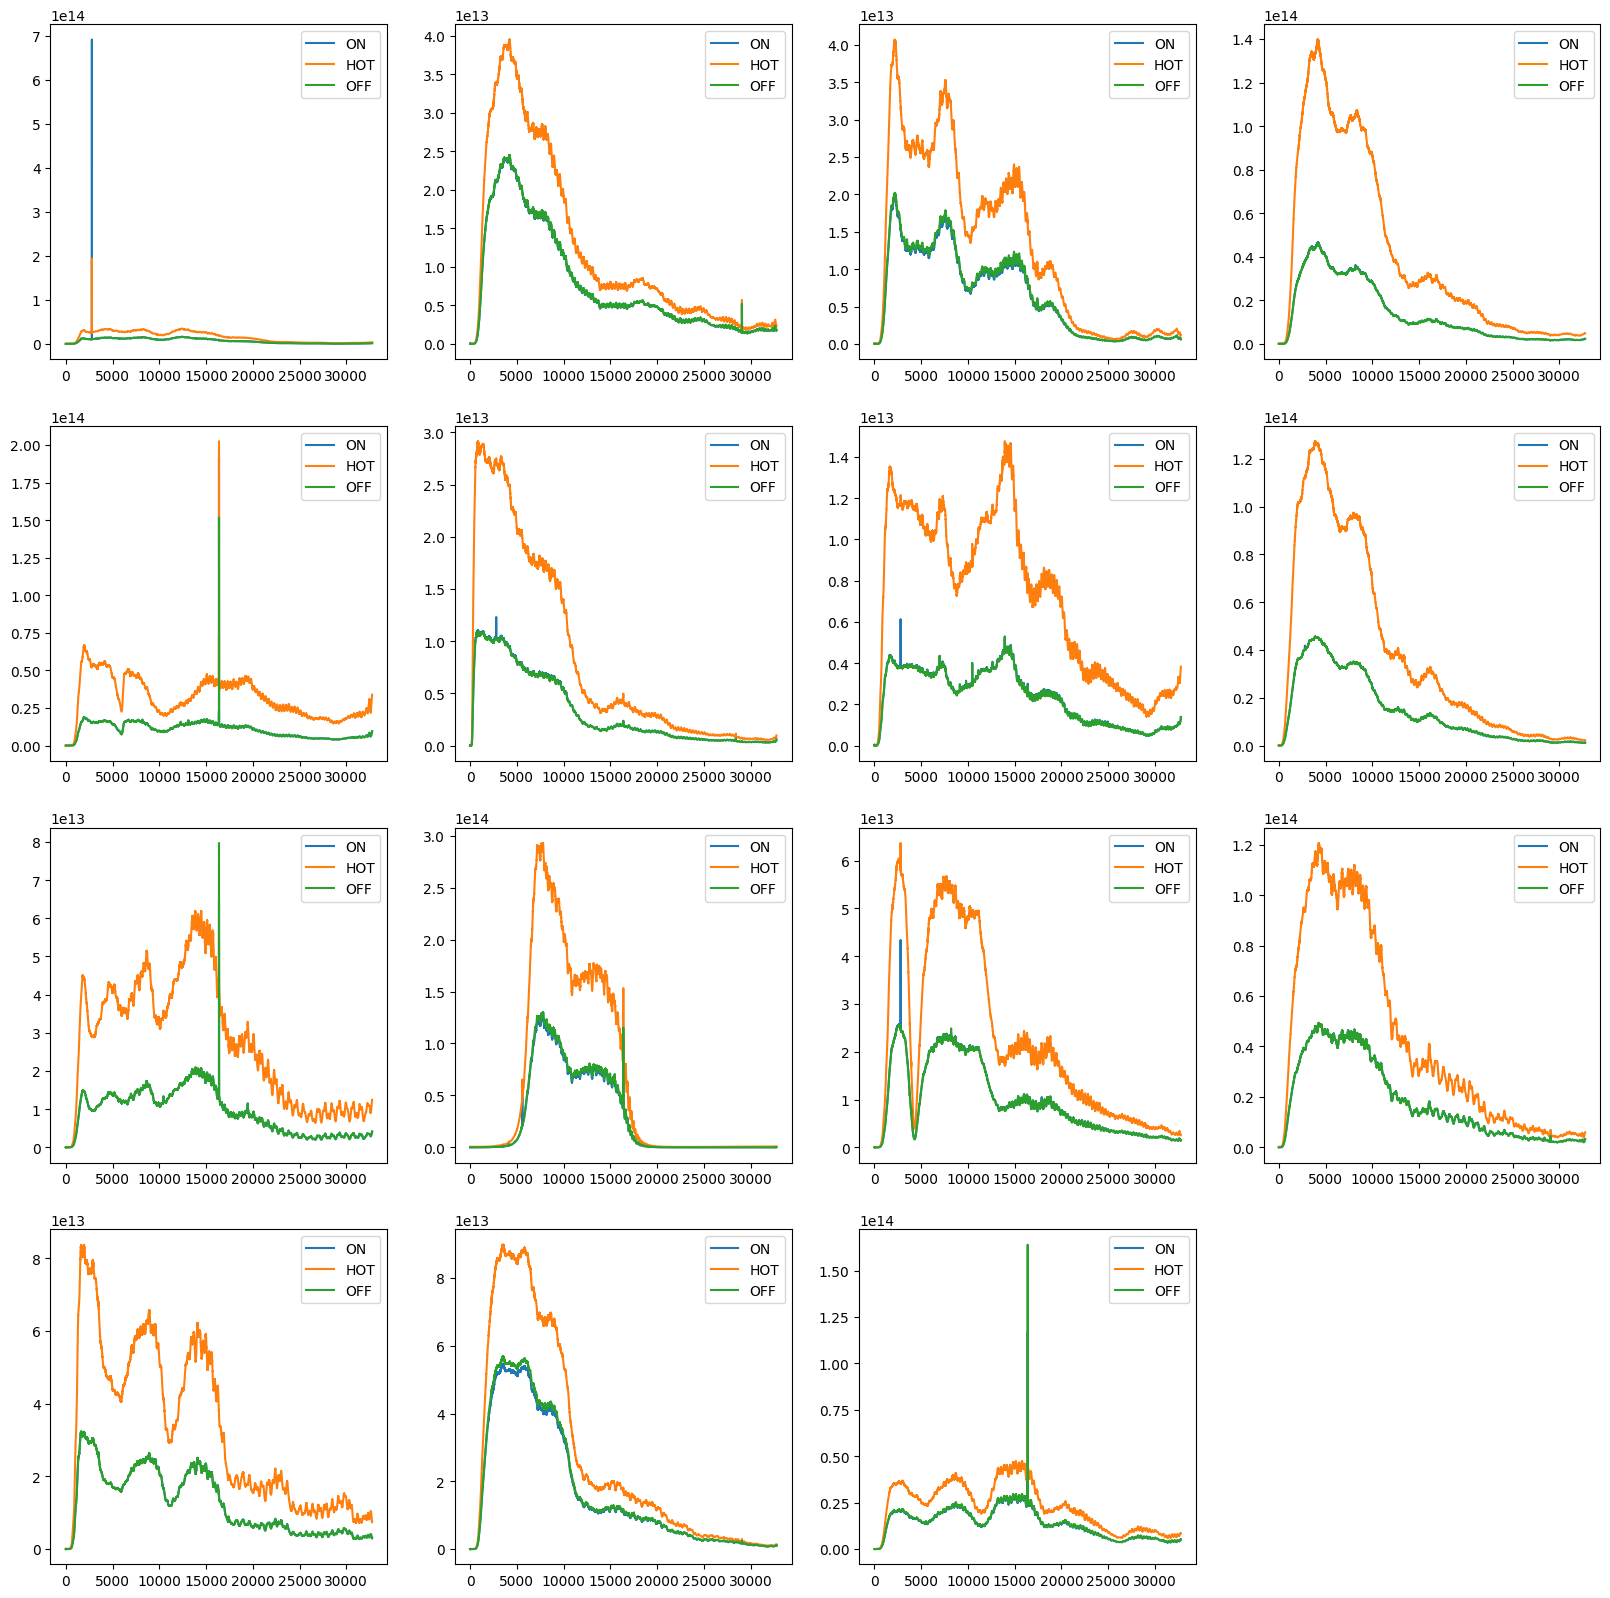

In [7]:
# inspect band characteritics

fig = plt.figure(figsize=(20,20))
axes = [fig.add_subplot(4,4,i+1) for i in range(15)]
lns_on = [ax.plot(sky_average, label="ON") for ax, sky_average in zip(axes, on_list)]
lns_hot = [ax.plot(hot_average, label="HOT") for ax, hot_average in zip(axes, hot_list)]
lns_off = [ax.plot(hot_average, label="OFF") for ax, hot_average in zip(axes, off_list)]
[ax.legend() for ax in axes]

In [8]:
# chopper-wheel

calibrated = [((on-off) / (hot-off))*290 for on, hot, off in zip(on_list, hot_list, off_list)]

ifs = ["2LL", "2RU", "2RL", "3LU", "3LL", "3RU", "3RL", "4LU", "4LL", "1LU", "2LU", "5LU", "5LL", "5RU", "5RL"]

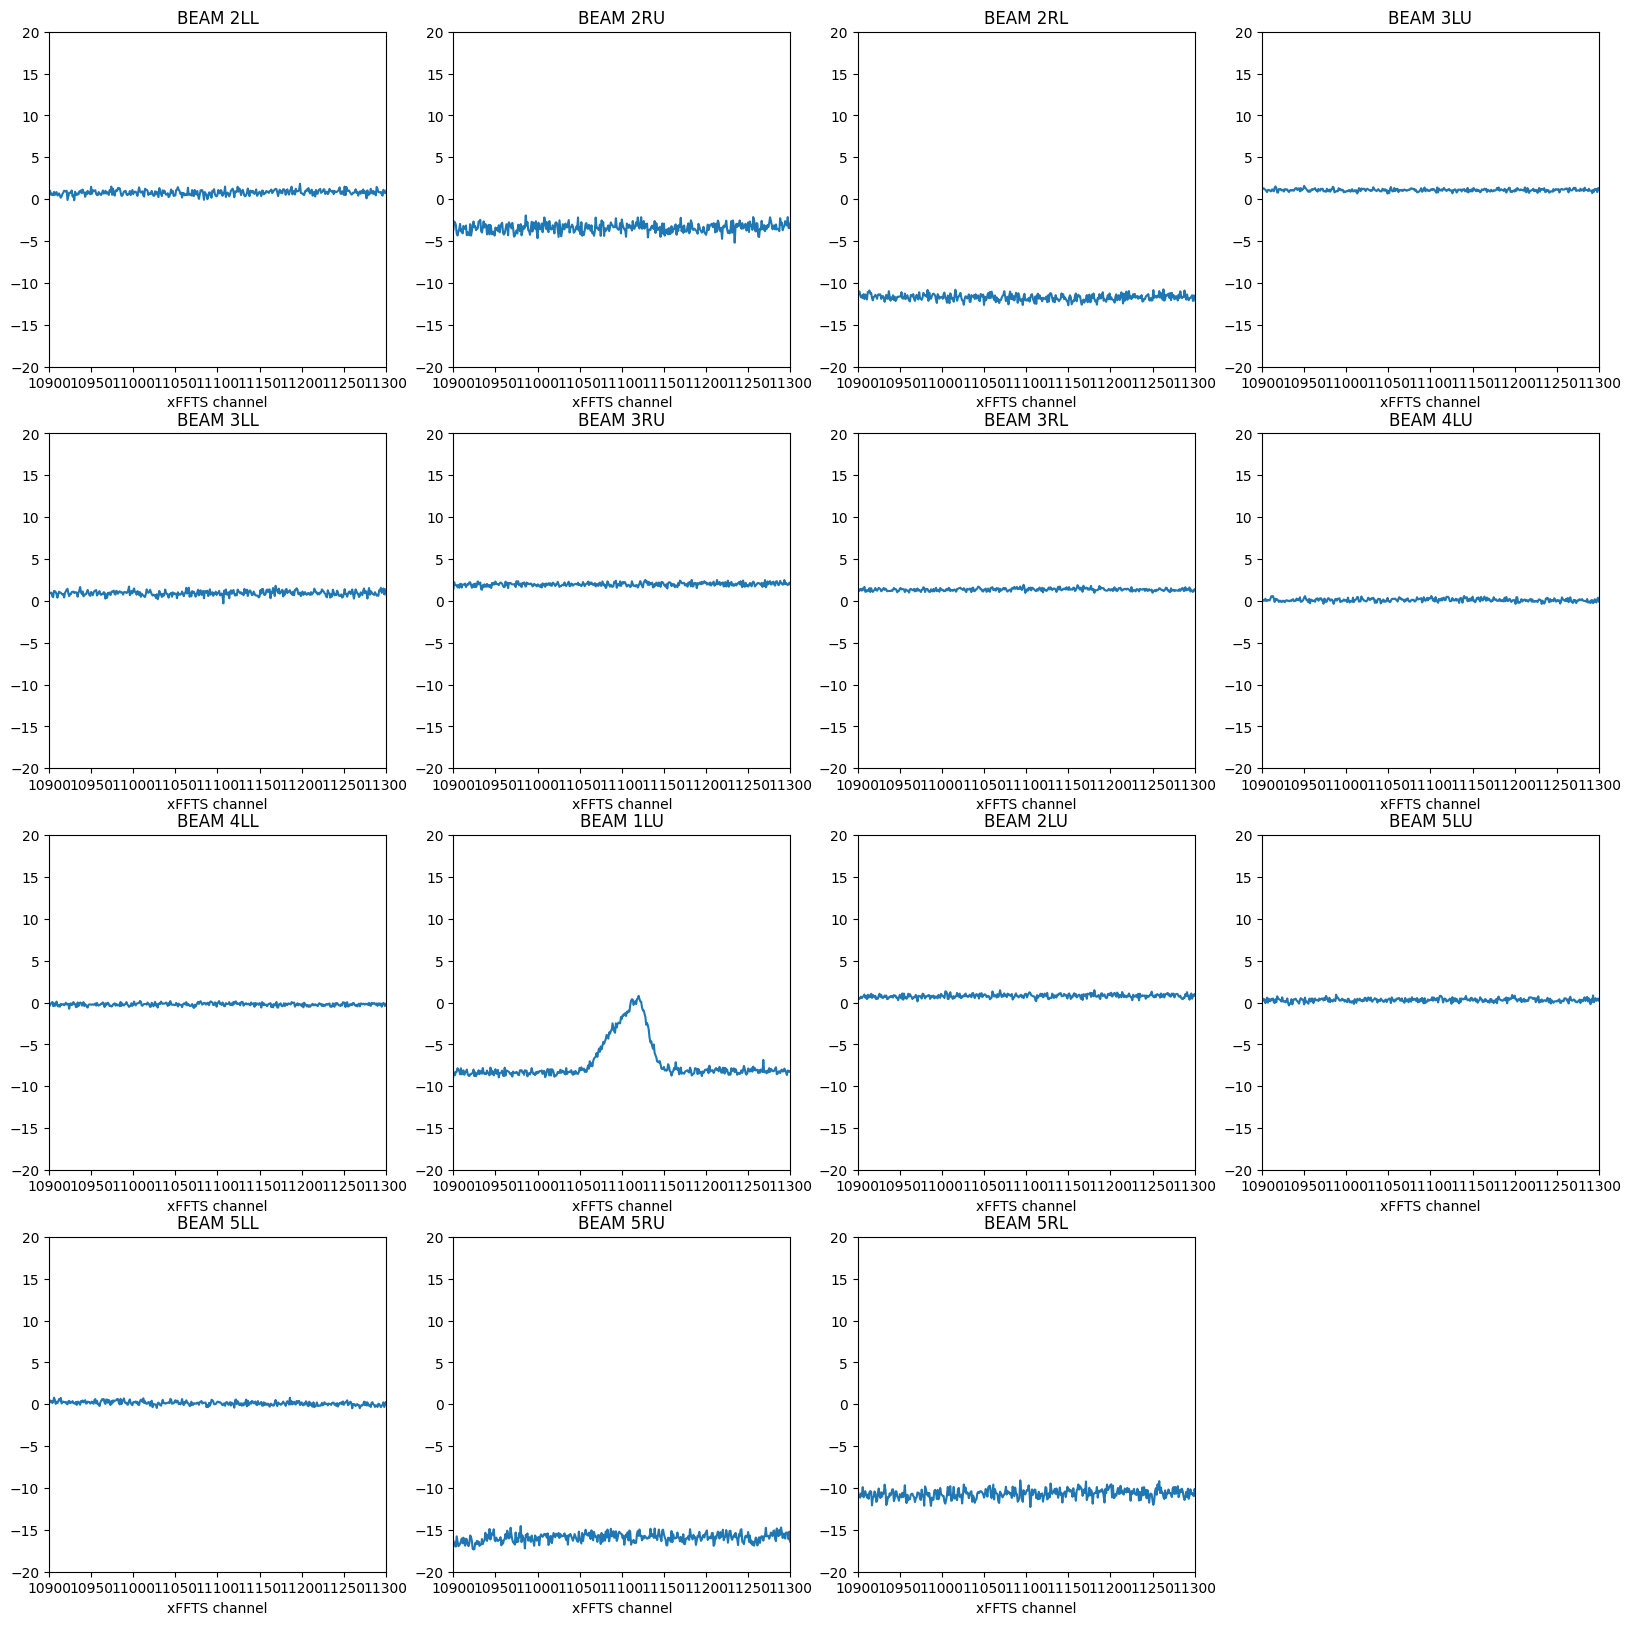

In [25]:
fig = plt.figure(figsize=(20,20))
axes = [fig.add_subplot(4,4,i+1) for i in range(15)]
spec = [ax.plot(sky_average, label="Spectra toward Rho-Ophu") for ax, sky_average in zip(axes, calibrated)]
#[ax.legend() for ax in axes]
[ax.set_ylim(-20, 20) for ax in axes]
[ax.set_title(f"BEAM {txt}") for ax, txt in zip(axes, ifs)]
[ax.set_xlim(11100-200, 11100+200) for ax in axes]
#[ax.set_xlim(17900-200, 17900+200) for ax in axes]
[ax.set_xlabel("xFFTS channel") for ax in axes]
fig.savefig(f"{dataname}_12CO21.pdf", bbox_inches="tight")

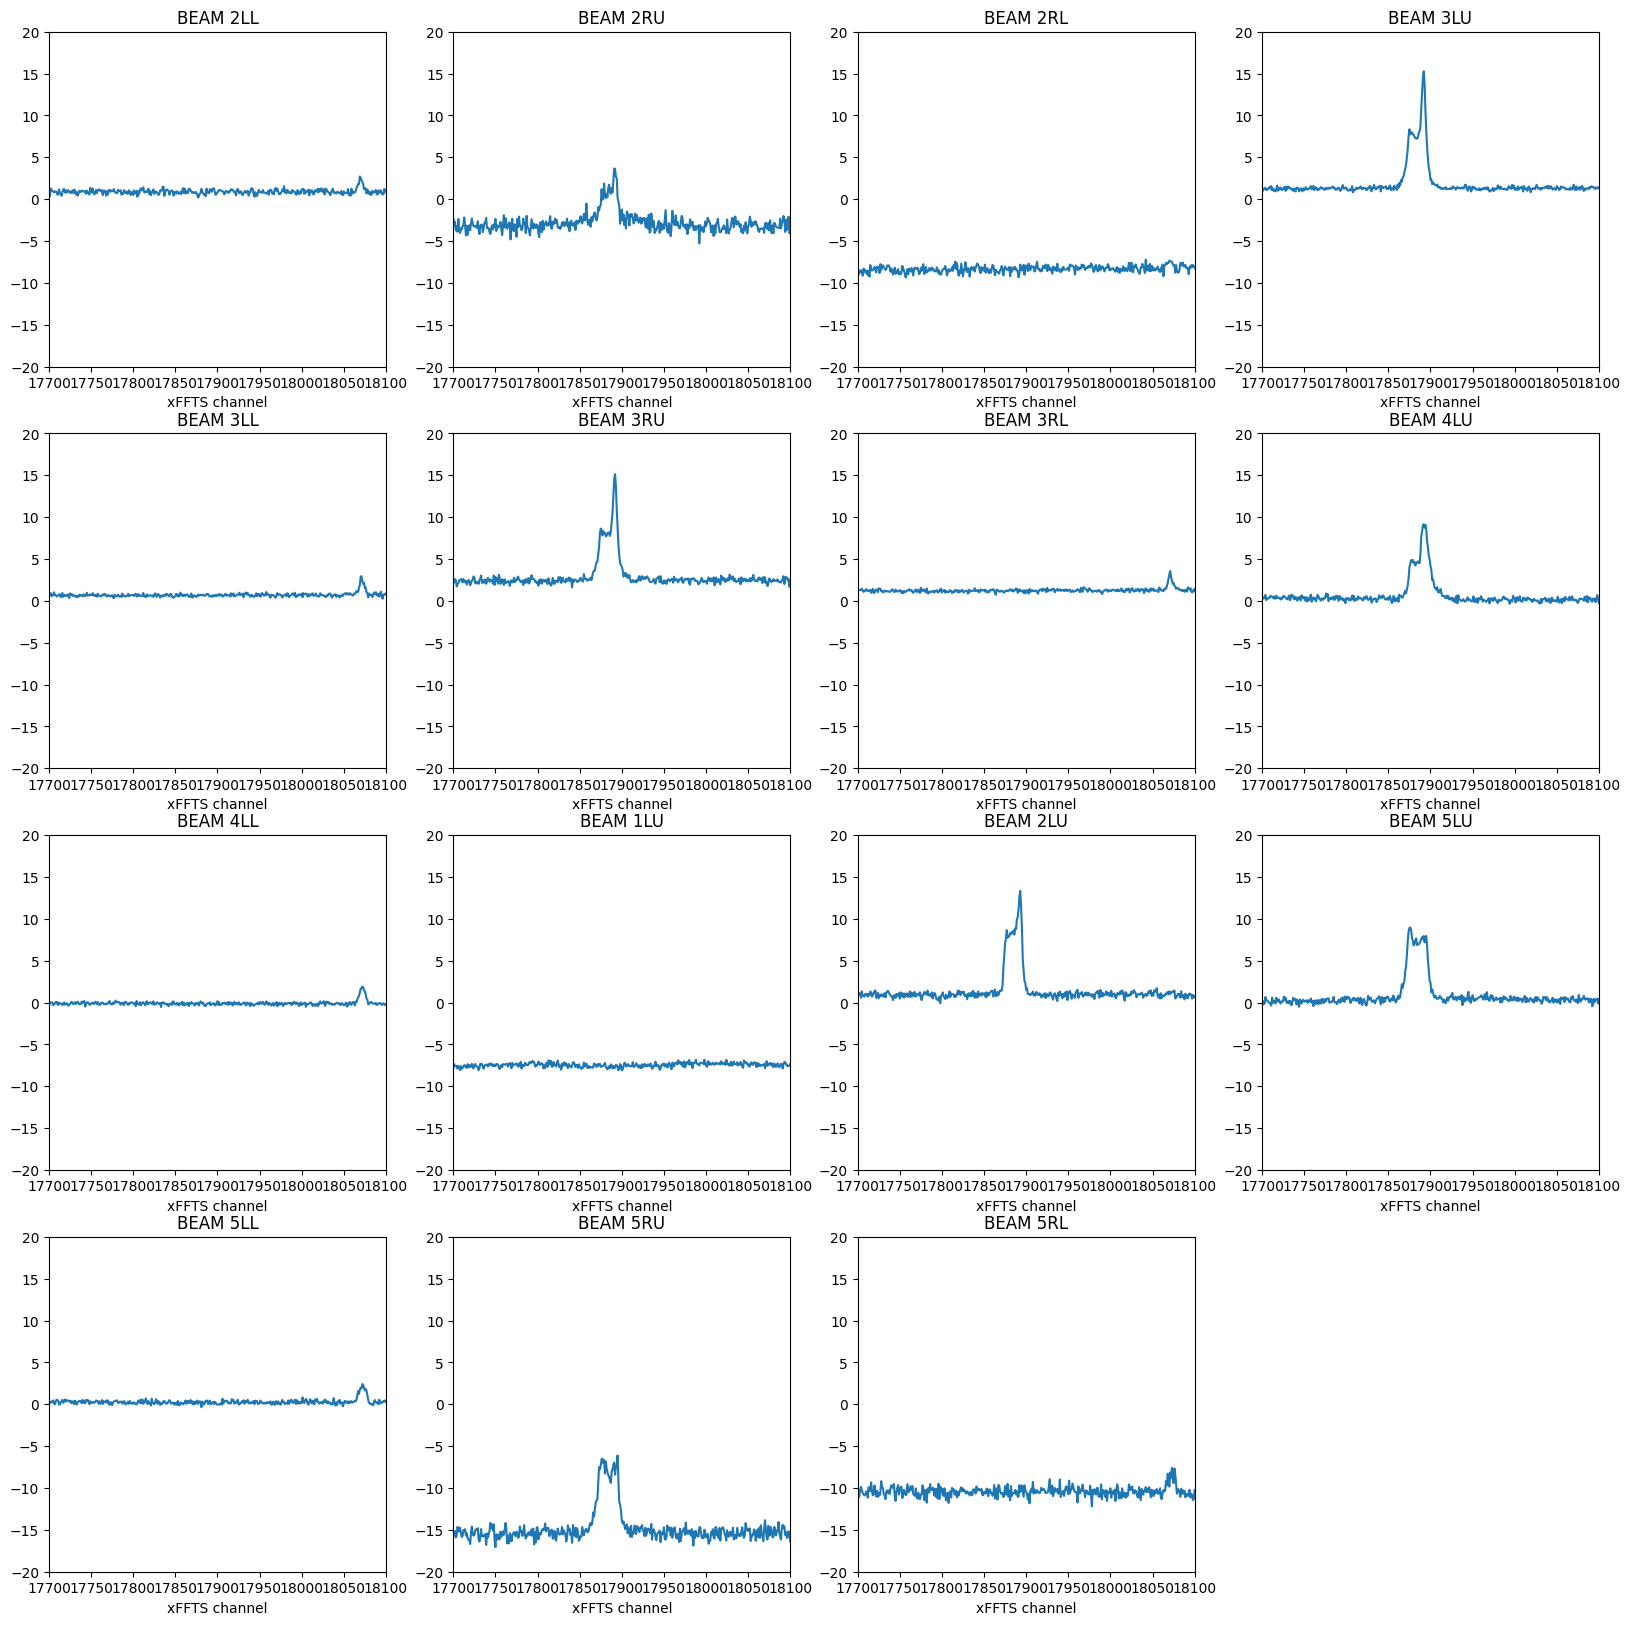

In [26]:
fig = plt.figure(figsize=(20,20))
axes = [fig.add_subplot(4,4,i+1) for i in range(15)]
spec = [ax.plot(sky_average, label="Spectra toward Rho-Ophu") for ax, sky_average in zip(axes, calibrated)]
#[ax.legend() for ax in axes]
[ax.set_ylim(-20, 20) for ax in axes]
[ax.set_title(f"BEAM {txt}") for ax, txt in zip(axes, ifs)]
#[ax.set_xlim(10000, 12000) for ax in axes]
[ax.set_xlim(17900-200, 17900+200) for ax in axes]
[ax.set_xlabel("xFFTS channel") for ax in axes]
fig.savefig(f"{dataname}_12CO.pdf", bbox_inches="tight")


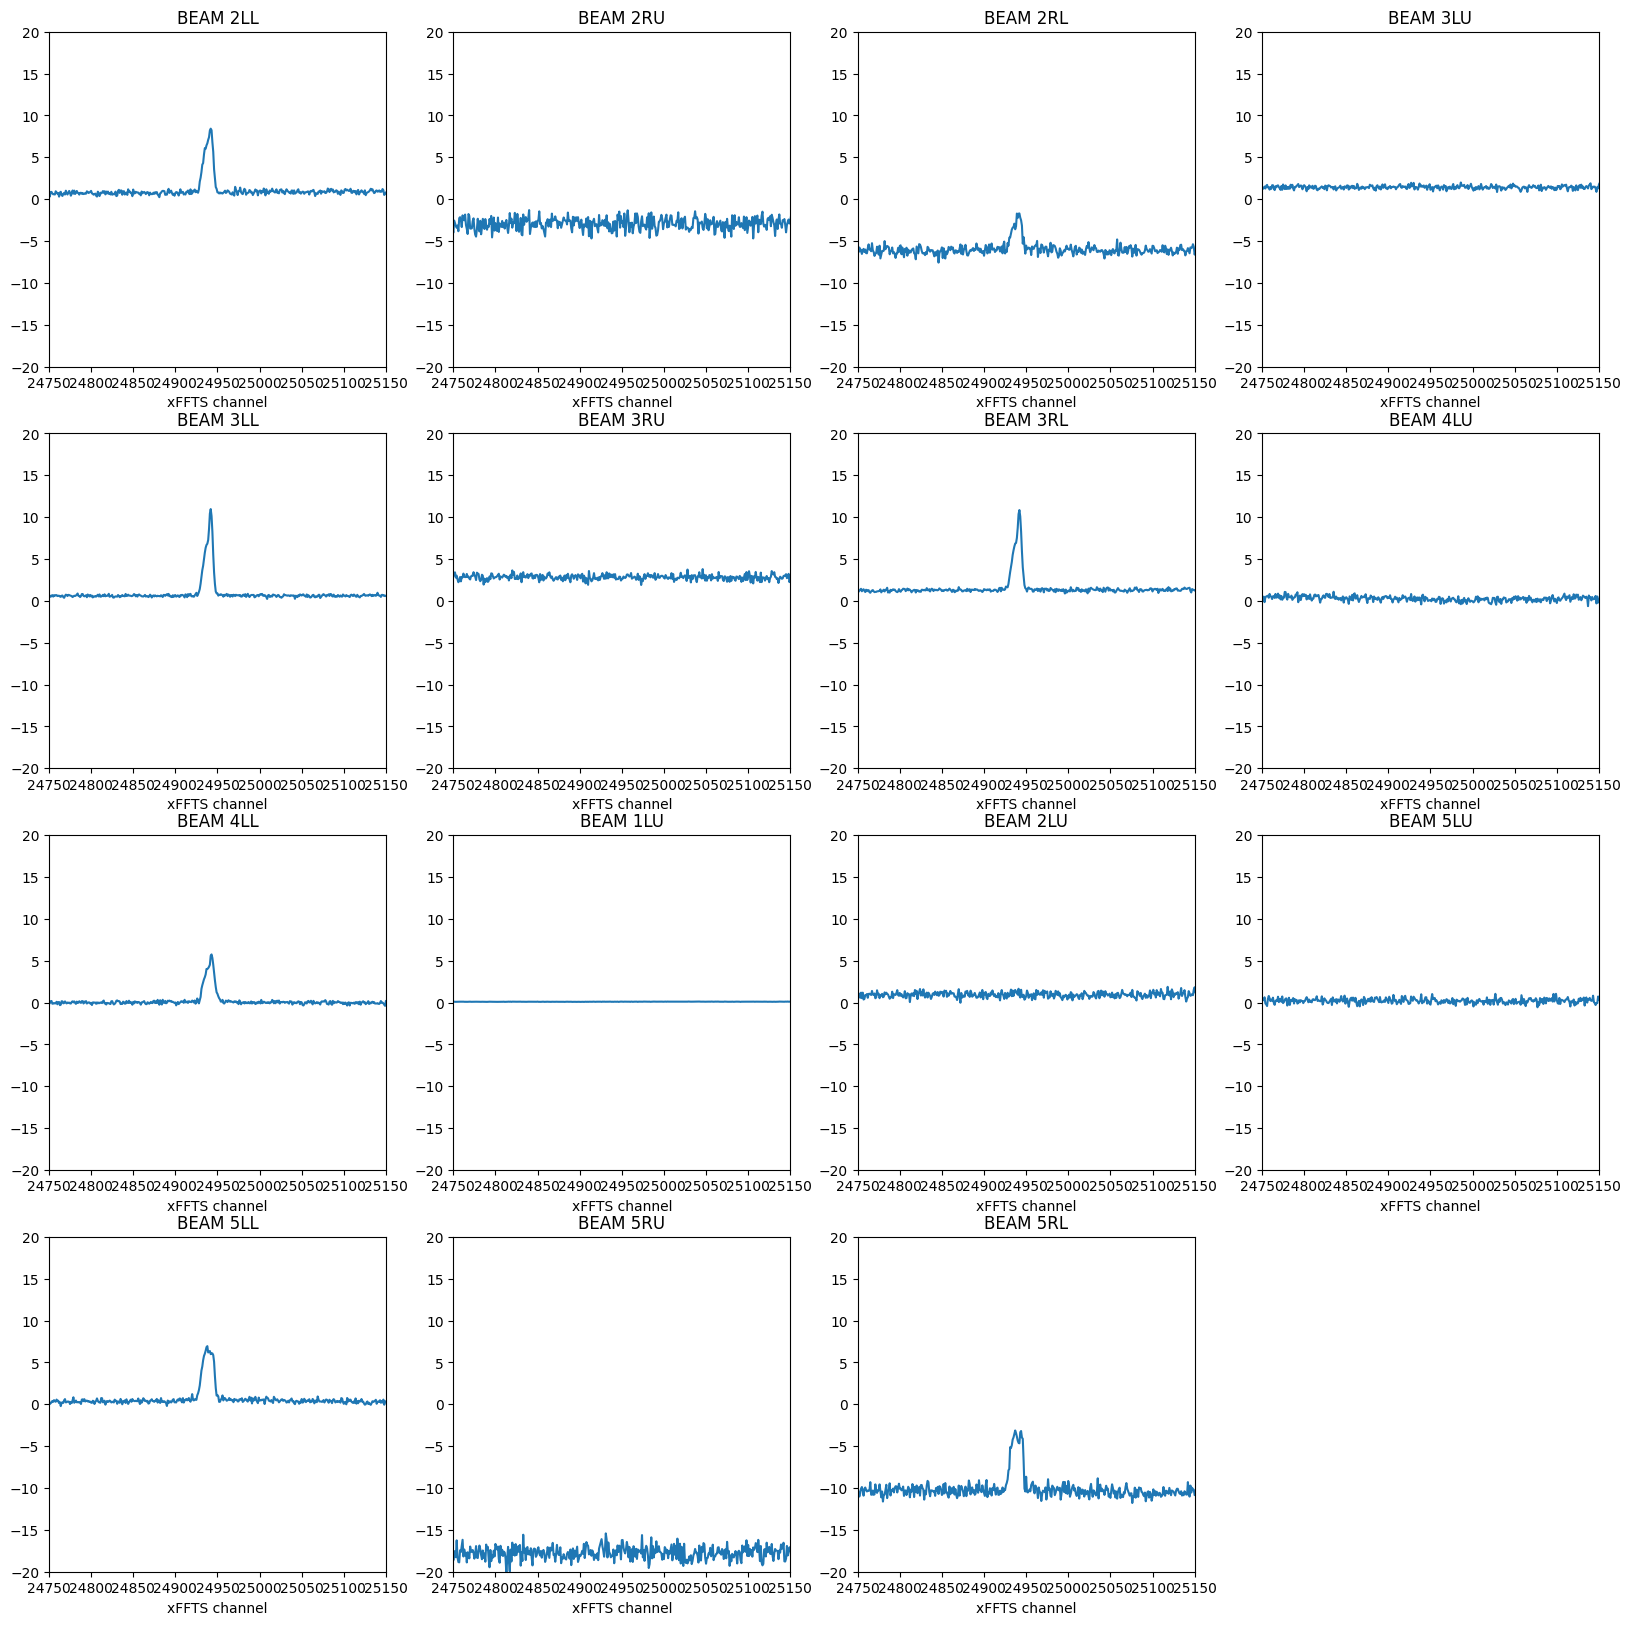

In [27]:
fig = plt.figure(figsize=(20,20))
axes = [fig.add_subplot(4,4,i+1) for i in range(15)]
spec = [ax.plot(sky_average, label="Spectra toward Rho-Ophu") for ax, sky_average in zip(axes, calibrated)]
#[ax.legend() for ax in axes]
[ax.set_ylim(-20, 20) for ax in axes]
[ax.set_title(f"BEAM {txt}") for ax, txt in zip(axes, ifs)]
[ax.set_xlim(24950-200, 24950+200) for ax in axes]
[ax.set_xlabel("xFFTS channel") for ax in axes]
#[ax.set_xlim(17900-200, 17900+200) for ax in axes]
fig.savefig(f"{dataname}_13CO.pdf", bbox_inches="tight")